In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import re
import sys
import nltk
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem.porter import *
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from gensim.models import word2vec

from sklearn.manifold import TSNE
from sklearn import metrics
import pandas as pd 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import jaccard_similarity_score
cv = CountVectorizer()
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
stop = set(stopwords.words("english"))
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("Kissan_data.csv")
data.head(2)

,Season,Sector,Category,Crop,QueryType,QueryText,KCCAns,StateName,DistrictName,BlockName,CreatedOn
0,KHARIF,HORTICULTURE,Fruits,Acid Lime,\tPlant Protection\t,Asked about citrus canker management,recommended for spray copper oxychloride 2.5gm...,PUDUCHERRY,PUDUCHERRY,BAHOUR,2016-09-04 8:42:41
1,KHARIF,HORTICULTURE,Vegetables,Brinjal,\tPlant Protection\t,shoot borer in brinjal,Recommended for spray profenophos 2ml + teepol...,PUDUCHERRY,PUDUCHERRY,Mannadipet,2016-09-07 11:18:58


Text(0.5,1,'QueryText')

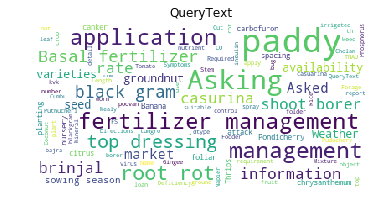

In [3]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['QueryText']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("QueryText")

Text(0.5,1,'KCCAns')

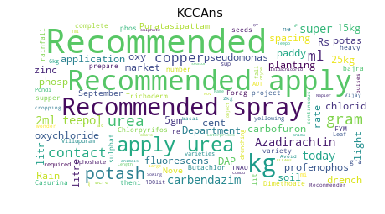

In [4]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['KCCAns']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('KCCAns')

Text(0.5,1,'QueryType')

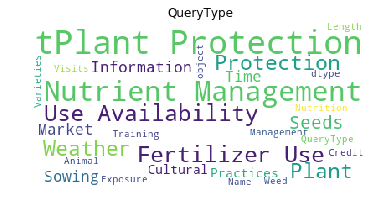

In [5]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['QueryType']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('QueryType')

Text(0.5,1,'Crop')

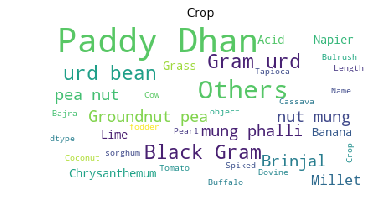

In [6]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Crop']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Crop")

Text(0.5,1,'Category')

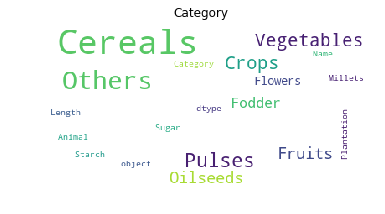

In [7]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(data['Category']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Category")

In [8]:
%%timeit
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s
data['QueryType'] = [cleaning(s) for s in data['QueryType']]
data['QueryText'] = [cleaning(s) for s in data['QueryText']]
data['KCCAns'] = [cleaning(s) for s in data['KCCAns']]


86.8 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


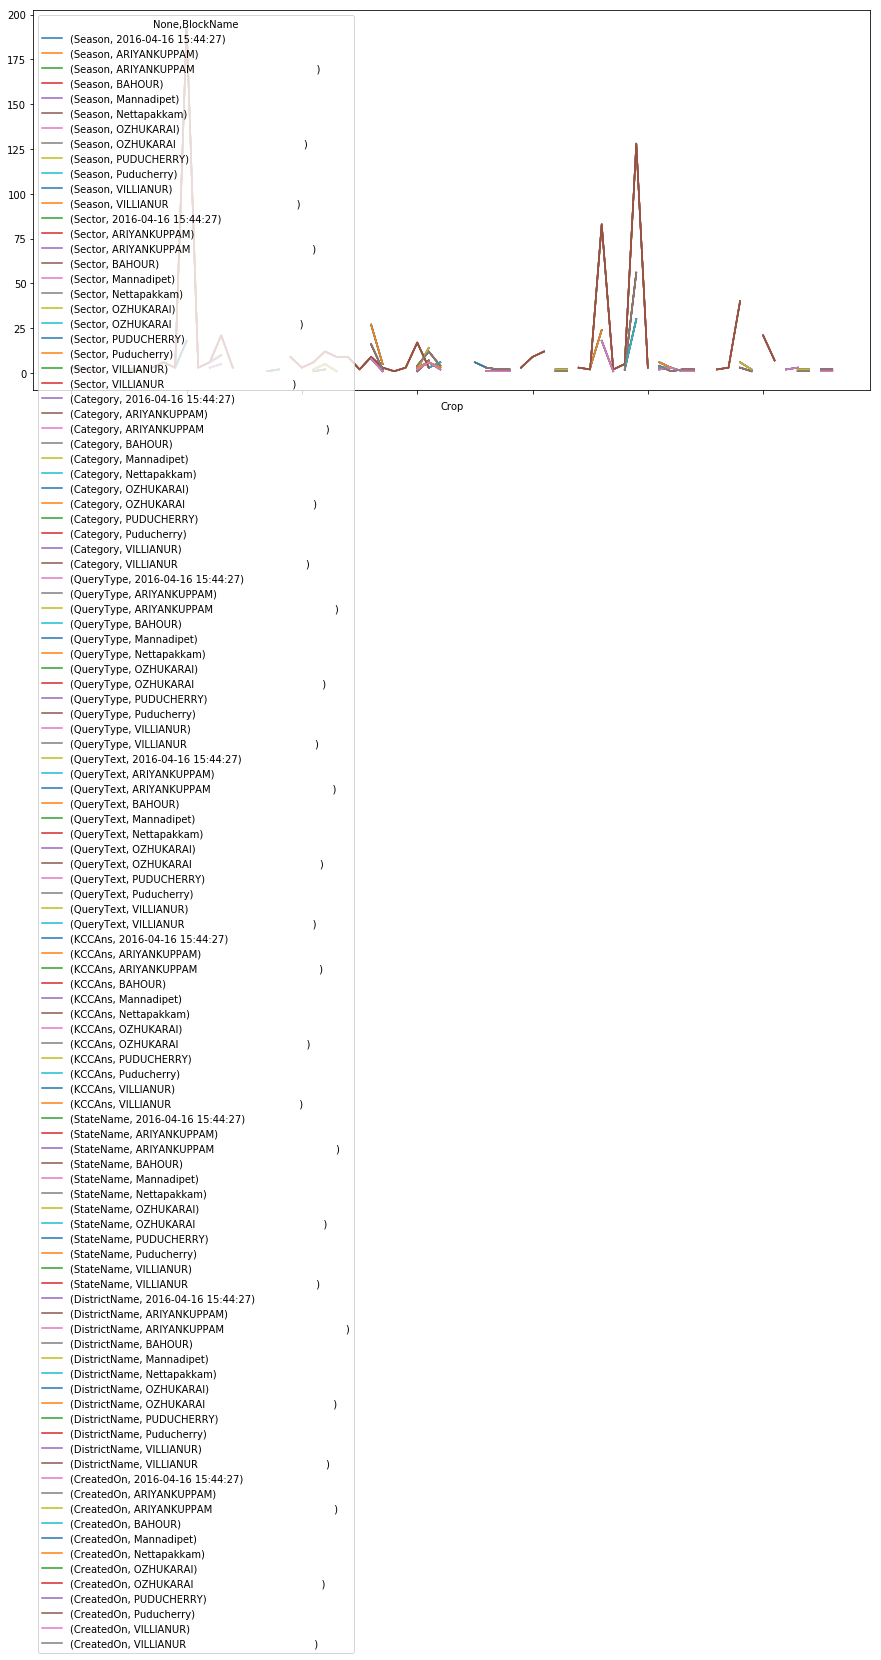

In [37]:
#data.groupby(['Crop', 'QueryType']).count().plot(figsize=(15,7))
data.groupby(['Crop','BlockName']).count().unstack().plot(figsize=(15,7))

In [9]:
#TfidfVectorization
#K means clustering
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['QueryType'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 
    

cluster of words 0:
 seeds
 material
 planting
 weed
 fertilizers
 mechanization
 market
 management
 maket
 livestock

cluster of words 1:
 protection
 plant
 weed
 field
 mechanization
 material
 market
 management
 maket
 livestock

cluster of words 2:
 management
 nutrient
 weed
 availability
 goatery
 nan
 mechanization
 material
 market
 animal

cluster of words 3:
 market
 information
 weed
 weather
 nan
 mechanization
 material
 management
 maket
 livestock

cluster of words 4:
 varieties
 cultural
 practices
 weather
 fertilizer
 use
 availability
 sowing
 time
 bio



In [10]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['QueryText'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 
    

cluster of words 0:
 foliar
 asking
 paddy
 management
 spray
 blackgram
 availability
 black
 gram
 application

cluster of words 1:
 borer
 stem
 shoot
 brinjal
 paddy
 management
 fruit
 ntrol
 folder
 pod

cluster of words 2:
 market
 rate
 gram
 black
 paddy
 price
 thattanchavady
 villupuram
 information
 asking

cluster of words 3:
 season
 sowing
 gram
 black
 variety
 varieties
 asking
 suitable
 sesame
 blackgram

cluster of words 4:
 fertilizer
 management
 dressing
 basal
 paddy
 application
 asking
 sugarcane
 groundnut
 sesame



In [11]:
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data['KCCAns'].str.upper())
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

k=km.fit(model)
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("cluster of words %d:" %i)
    for ind in order_centroids[i,:10]:
        print(' %s' % terms[ind])
    print() 
    

cluster of words 0:
 vbn
 bg
 tnau
 blackgram
 varieties
 gram
 gg
 black
 apk
 adipattam

cluster of words 1:
 spray
 water
 ml
 lit
 litre
 remmended
 gm
 dap
 teepol
 oil

cluster of words 2:
 ntact
 number
 remmended
 phone
 department
 research
 bank
 veterinary
 rice
 villupuram

cluster of words 3:
 rs
 quintal
 market
 adt
 rate
 remmended
 black
 gram
 paddy
 price

cluster of words 4:
 kg
 remmended
 apply
 urea
 ac
 acre
 potash
 season
 cake
 neem



In [12]:
#Building corpus from QueryType, QueryText
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['QueryType','QueryText']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]



[['', 'plant', 'protection', ''], ['', 'plant', 'protection', '']]

In [13]:
#Building corpus from QueryType, QueryText
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['QueryText','KCCAns']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)
            
    return corpus

corpus = build_corpus(data)        
corpus[0:2]


[['asked', 'about', 'citrus', 'canker', 'management'],
 ['shoot', 'borer', 'in', 'brinjal']]

In [25]:
model = word2vec.Word2Vec(corpus, size=100, window=20, min_count=20, workers=4)

In [15]:
model.wv['plant']


array([-0.08081441, -0.10457107,  0.36706254, -0.10784277,  0.13113983,
        0.01928597, -0.0033864 ,  0.13488729,  0.07062386, -0.01015255,
        0.3017427 , -0.12384705,  0.00425639,  0.18662159,  0.37605304,
        0.01925512,  0.09661444, -0.06842924,  0.01848376,  0.11718062,
        0.153078  ,  0.15201013,  0.01848328, -0.03378913,  0.19383678,
        0.24195479, -0.0093773 , -0.09568089, -0.14640132, -0.05629657,
        0.28492022, -0.14882234, -0.02698545,  0.12790573, -0.13169515,
        0.0652513 ,  0.12241393, -0.02462788, -0.0613067 ,  0.00977112,
       -0.06111172,  0.0072946 , -0.03630025, -0.11261242,  0.15518923,
       -0.04214093,  0.0301597 , -0.05139667,  0.00467133,  0.08876626,
        0.11780638,  0.03723271,  0.05347826, -0.11586704,  0.13087764,
       -0.15926611, -0.08267757,  0.11468482, -0.04719298,  0.0059282 ,
        0.15888131,  0.06447206,  0.07041255, -0.25150093, -0.19526133,
        0.2838915 ,  0.07623974, -0.26544815, -0.07423562, -0.04

In [16]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

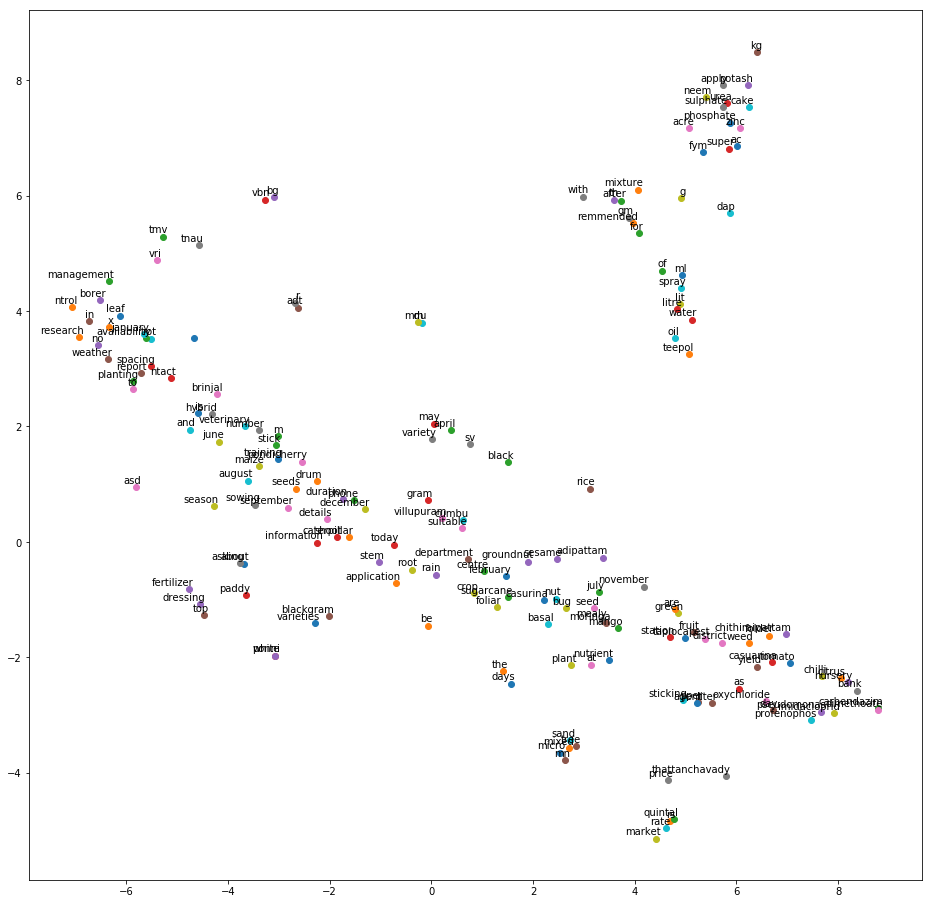

In [17]:
tsne_plot(model)


In [18]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text=data['QueryText']
train_text=data['QueryText']
y=data['KCCAns']

In [19]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [20]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])

In [21]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)

In [22]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)
preds=classifier.predict(X_test)

In [23]:
from sklearn.metrics import classification_report, accuracy_score
rf_accuracy=accuracy_score(preds,y_test)
rf_accuracy=accuracy_score(preds,y_test)
print("Random Forest Model accuracy",rf_accuracy)

Random Forest Model accuracy 0.749555950266
